## Recognising hand-written digits with a deep model

In this tutorial we will use the library called sklearn to build a simple deep network that will learn to recognise hand-written digits from the well-known MNIST dataset.

In [1]:
# import matplotlib for results visualization
import matplotlib.pyplot as plt
# import the dataset and the deep model from sklearn
from sklearn import datasets

### Preparing the dataset
In sklearn we can directly download the MNIST dataset and see a couple of examples of data points.

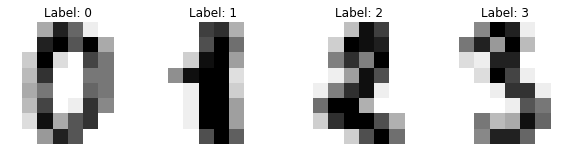

In [2]:
digits = datasets.load_digits()
labels = digits.target
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)

### Q1
How big is your dataset?

### Q2
Why do you think we do the following?

In [3]:
data = digits.images.reshape((len(digits.images), -1))

Variable "digits" will now store all the pictures, while "labels" will store the labels.

Instead of building the deep network node by node, we can use a ready-made class MLPClassifier (multi-layer perceptron classifier) obtained from sklearn.neural_network library. You can import this class directly.

### Q3
Import the MLPClassifier model

In [4]:
# import the MLP model for classification
from sklearn.neural_network import MLPClassifier

Split the dataset into training and testing subsets, using the "train_test_split" function from sklearn.model_selection library.

If you are unsure of how to use this function, "Google" it to find the sklearn library documentation here:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### Q4 
Split the dataset into train / test subsets

In [5]:
from sklearn.model_selection import train_test_split
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size = test_size, shuffle=True)

Define your model. You can find different attributes of the MLPClassifier class online here:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

See how many of these attroibutes make sense to you. If you don't explicitely define values of some (or even all) of these attributes, they will take default values.

### Q5
Define your model as an instance of the MLPClassifier class.

In [6]:
hidden_layer_sizes = (100,100,100,)
model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,alpha=0.001)

### Q6
Train the model by applying the function "fit" to the model itself. The arguments of this function should be the training dataset (adn training labels).

In [7]:
model.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100))

You can obtain the accuracy of your model by using the function "score" applied to the model, with arguments being the test dataset.

### Q7
Find the accuracy of the model

In [8]:
model.score(X_test, y_test)

0.9861111111111112

In order to assess "how bad" the model did, we can analyze carefully the cases where the model predicted wrong labels.

We can do this by looking at the number of false positives and false negatives and compare it with numbers of true positives and true negatives.

Confusion_matrix is a sklearn function that you can import from sklearn.metrics library. It takes 2 arguments: true labels and predicted labels.

### Q8
Display the confusion matrix for your trained model.

Hint：  you can get predicted labels to your model by applying the "predict" function directly to your model, with arguments being the correct dataset.

In [9]:
pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1, 49,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30]])